In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np 
import matplotlib.pylab as plt

In [2]:
genotype_dict = {"dicer_ko": "KO", "dicer_overexpressed": "OE", "wild_type": "WT"}

In [3]:
# import filtered mutations

fname_mutations_all_samples = 'mutations_of_all_samples_after_filtering.csv'

df = pd.read_csv(fname_mutations_all_samples)
df = df.drop(['Unnamed: 0'], axis=1)

df = df[df['genotype']!='aaa_parental_stock']
df["genotype"] = df["genotype"].apply(lambda x: genotype_dict[x])

In [4]:
# Filtering for the heatmap plots
# filter out mutations that show never a frequency >= 0.1 in any sample
frequency_threshold = 0.01
df_temp = df[df['frequency']>=frequency_threshold]
high_freq_positions = df_temp['Pos'].values

df = df[df['Pos'].isin(high_freq_positions)]

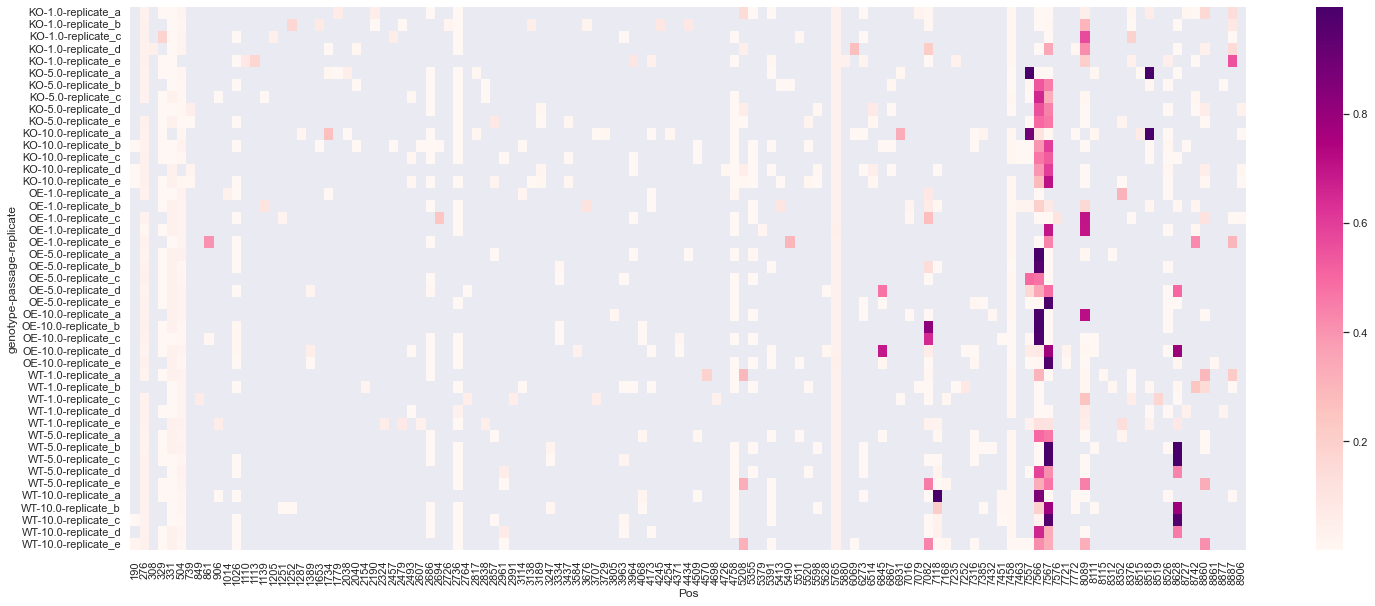

In [8]:
sns.set(rc={'figure.figsize':(25,10)})
# Pivot table 
df_heatmap = df[['genotype', 'replicate', 'passage', 'Pos', 'frequency']]
df_heatmap = df_heatmap.pivot_table(values='frequency', 
                                    index=[ 'genotype', 'passage', 'replicate'], 
                                    columns='Pos', 
                                    aggfunc=np.max,
                                   )

positions = df_heatmap.columns.to_list()

# plot heatmap in normal scale

g = sns.heatmap(df_heatmap, xticklabels = positions, cmap="RdPu")
fig = g.get_figure()
plt.xticks(rotation=90, fontsize=11)
plt.show()

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_35613/1219244664.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heatmap['frequency_log'] = np.log10(df_heatmap['frequency'])


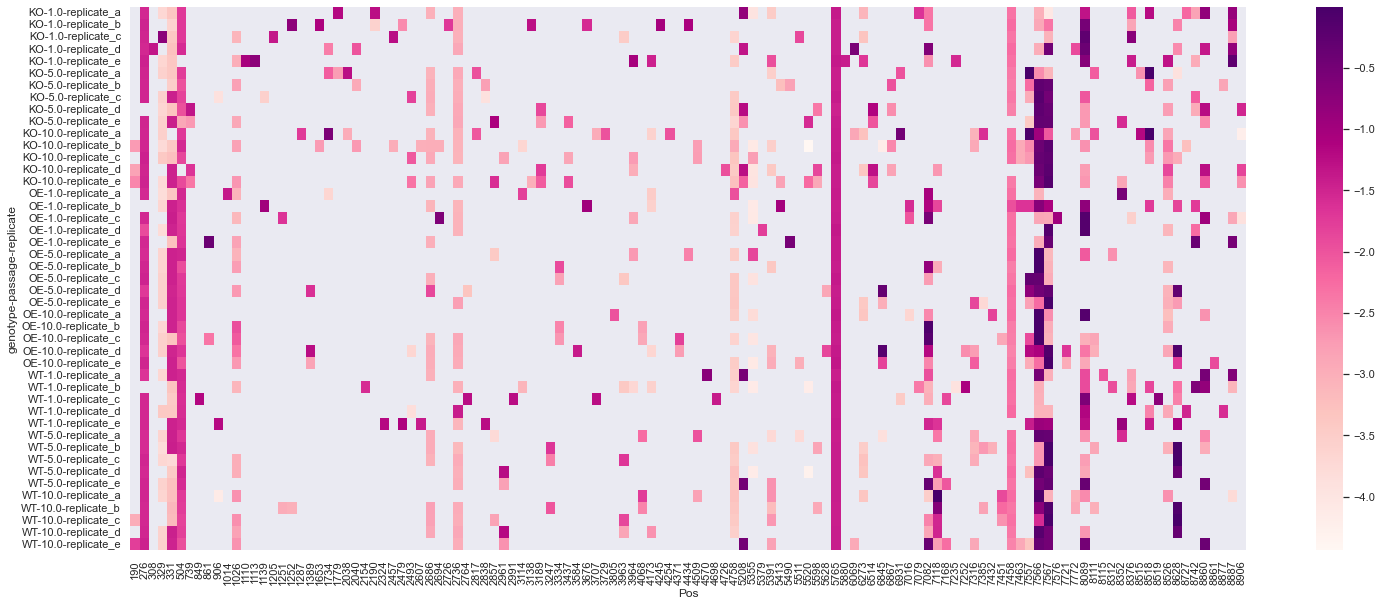

In [9]:
sns.set(rc={'figure.figsize':(25,10)})

# plot heatmap in log10 scale
df_heatmap = df[['genotype', 'replicate', 'passage', 'Pos', 'frequency']]
df_heatmap['frequency_log'] = np.log10(df_heatmap['frequency'])

df_heatmap = df_heatmap.pivot_table(values='frequency_log', 
                                    index=['genotype', 'passage', 'replicate'], 
                                    columns='Pos', 
                                    aggfunc=np.max,
                                   )

positions = df_heatmap.columns.to_list()

g = sns.heatmap(df_heatmap, xticklabels = positions, cmap="RdPu")
fig = g.get_figure()
plt.xticks(rotation=90, fontsize=11)
plt.show()

In [10]:
fig.savefig("./000__Manuscript_figures/Figure_4A__heatmap_mutation_calls.pdf")
fig.savefig("./000__Manuscript_figures/Figure_4A__heatmap_mutation_calls.svg")